In [6]:
import subprocess
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib import request
import requests
import numpy as np
import pickle

In [2]:
datapath = "/Users/yoshiki/research/Tlab/humdrum/database/"

In [3]:
genre = ["ballate", "ballad","chorale","contrafacta", "etude","fugue","madrigal", \
         "mazurka", "motet", "prelude", "ragtime", "quartet", "scherzo", "sonata", \
         "sonatina", "symphony", "virelai", "waltz"]

In [251]:
maxdl = 30
for g in range(len(genre)):
    foldername = datapath + genre[g]
    os.makedirs(foldername, exist_ok = True)
    url = "http://kern.humdrum.org/search?s=t&keyword=" + genre[g]
    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()
    krnlinks = []
    links = soup.find_all('a')
    for link in links:
        try:
            href = link.get('href')
            if href.endswith("kern"):
                krnlinks.append(href)
        except:
            print(link)

    if len(krnlinks) == 0:
        print(genre[g])
        break
    else:
        tmp = np.random.permutation(len(krnlinks))
        count = 0
        for k in range(len(tmp)):
            url2 = krnlinks[tmp[k]]
            fname = url2.split("&")[-2].split("=")[1]
            urlData = requests.get(url2).content
            if b'<html>' in urlData:
                continue
            with open(foldername + "/" + fname ,mode='wb') as f: # wb でバイト型を書き込める
                f.write(urlData)
            count += 1
            print(genre[g], fname)
            if count >= maxdl:
                break

ballate angelica.krn
ballate echo.krn
ballad ukrain12.krn
ballad jugos067.krn
ballad nova124.krn
ballad deut4317.krn
ballad deut0605.krn
ballad deut4091.krn
ballad deut4286.krn
ballad deut3080.krn
ballad deut3657.krn
ballad nova065.krn
ballad polska22.krn
ballad deut3132.krn
ballad deut3580.krn
ballad deut4111.krn
ballad deut3546.krn
ballad deut3399.krn
ballad deut3266.krn
ballad neder073.krn
ballad deut3997.krn
ballad deut4216.krn
ballad deut4204.krn
ballad deut3616.krn
ballad nova068.krn
ballad neder002.krn
ballad deut4106.krn
ballad deut3063.krn
ballad deut0738.krn
ballad deut3975.krn
ballad deut3515.krn
ballad deut2988.krn
chorale xxerk191.krn
chorale chor-057.krn
chorale chor280.krn
chorale bwv0355.krn
chorale chor104.krn
chorale chor045.krn
chorale chor024.krn
chorale chor066.krn
chorale chor217.krn
chorale chor028.krn
chorale chor083.krn
chorale chor368.krn
chorale chor230.krn
chorale chor-112.krn
chorale chor201.krn
chorale chor-132.krn
chorale chor-137.krn
chorale chor167.krn


symphony sym102b.krn
symphony sym100c.krn
symphony sym100a.krn
symphony piston172.krn
symphony sym099b.krn
symphony schumann-97-4-1.krn
symphony sym103b.krn
symphony sym100d.krn
symphony piston293.krn
symphony sym103a.krn
symphony sym104d.krn
symphony sym103c.krn
symphony sym101b.krn
symphony sym099d.krn
symphony sym102a.krn
symphony sym104c.krn
symphony tmte04-63i.krn
symphony sym103d.krn
symphony sym102c.krn
symphony sym102d.krn
symphony sym101a.krn
symphony sym099c.krn
symphony sym104b.krn
symphony sym101c.krn
symphony sym104a.krn
symphony sym101d.krn
symphony sym100b.krn
virelai de_bonte.krn
waltz waltz64-2.krn
waltz waltz64-1.krn
waltz binks.krn
waltz op39-09.krn
waltz bethena.krn
waltz piston107.krn
waltz op39-08.krn
waltz harmony.krn
waltz waltz150.krn
waltz op39-02-chord.krn
waltz augustan.krn
waltz waltz69-2.krn
waltz op39-02.krn
waltz op39-01.krn
waltz op12-2.krn
waltz op39-08-chord.krn
waltz pleasant.krn


In [4]:
def isonlynum(s):
    return True if re.fullmatch('[0-9]+', s) else False

In [5]:
alldata = dict()

for g in range(len(genre)):
    files = []
    dirpath = datapath + genre[g]
    for f in os.listdir(dirpath):
        if f.endswith("krn"):
            files.append((dirpath, f))
    files = sorted(files)
    isis = []
    for num in range(len(files)):
        fpath = files[num][0] + "/" +files[num][1]
        cmd = "dur -x {} | rid -GLId | grep -v '^=' | stats".format(fpath)
        result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
        cmd = "rid -GLId {} | grep -v '^=' -> rid.txt".format(fpath)
        stdout = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
        try:
            result_ = result.decode('utf-8', errors='replace')
            ns_ = result_.split("\n")[0].split("\t")[1]
            ns = int(ns_)

            leng_ = result_.split("\n")[1].split("\t")[1]
            leng = float(leng_)
            with open('rid.txt', 'r') as f:
                counter = 0
                for i, line in enumerate(f.readlines()):
                    line2 = line.replace("\t","").replace("\n","")
                    line3 = line2.replace(".","").replace("r","")
                    if isonlynum(line3):
                        counter += 1
            isi = leng / (ns - counter)
            #isi = leng / ns
            #print("total",leng, "raw",ns, "processed",ns - counter, "isi",isi)
            isis.append(isi)
        except:
            print("error", genre[g], files[num][1])
    alldata[genre[g]] = isis

error chorale bwv0291.krn
error chorale bwv0317.krn
error chorale chor024.krn
error chorale chor217.krn
error chorale chor230.krn
error chorale chor303.krn
error chorale chor368.krn
error etude etude65-2.krn
error etude op39-01.krn
error etude op39-02.krn
error etude op39-04.krn
error mazurka mazurka33-1.krn
error mazurka op46-3.krn
error prelude chor088-auto.krn
error prelude prelude28-05.krn
error prelude prelude28-17.krn
error prelude prelude28-21.krn
error prelude prelude67-11.krn
error ragtime antoinette.krn
error ragtime augustan.krn
error ragtime bethena.krn
error ragtime binks.krn
error ragtime breeze.krn
error ragtime cascades.krn
error ragtime chrysanthemum.krn
error ragtime cleopha.krn
error ragtime combination.krn
error ragtime countryclub.krn
error ragtime crush.krn
error ragtime elite.krn
error ragtime entertainer.krn
error ragtime eugenia.krn
error ragtime figleaf.krn
error ragtime gladiolus.krn
error ragtime harmony.krn
error ragtime heliotrope.krn
error ragtime leola.k

In [7]:
with open(datapath + "alldata.pkl", mode = "wb") as f:
    pickle.dump(alldata, f)

In [9]:
data = []
labels = []
lgn = 0
for k in alldata.keys():
    if k == "ballad" or k == "ragtime":
        continue
    labels.append(k)
    lgn += len(alldata[k])
    data.append(tuple(np.array(alldata[k])*1000))

In [10]:
xs = np.array([32, 56, 100, 178, 316])*2
pfit = [-0.2046, 0.2345, 0.3621, 0.0953, -0.0026]
afit = [-0.6496, -0.0940, -0.2740, 0.3179, -0.2290]
zfit = [-0.0462, 0.4003, 0.2131, -0.7097, -0.9560]

In [11]:
cm = plt.cm.get_cmap("tab20")
clr = [cm(i) for i in range(len(data))]


c1 = np.round(np.array([1,0.2,0.2])*255)
c2 = np.round(np.array([0.6,0.3,0])*255)
c3 = np.round(np.array([0.5,0.2,0.4])*255)
print(c1, c2, c3)

cstr = []
for c_ in [c1,c2,c3]:
    c1_ = {n: int(c) for n, c in enumerate(c_)}
    cstr.append("#{0[0]:02x}{0[1]:02x}{0[2]:02x}".format(c1_))
    
lbls = ["Present model", "Drew & Abbott(2006)", "Zuk et. al. (2018)"]

[255.  51.  51.] [153.  76.   0.] [128.  51. 102.]


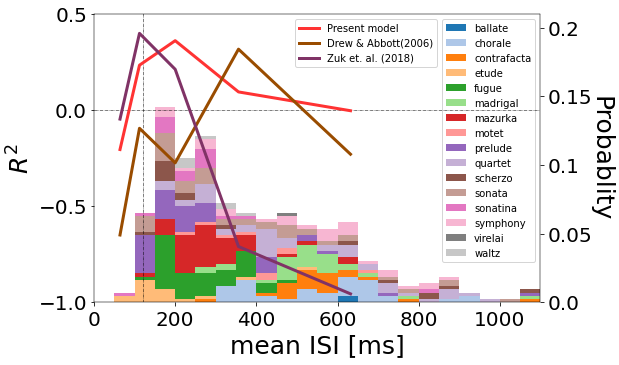

In [21]:
fig, ax2 = plt.subplots(figsize = (8,5.3))

ax2.plot([0,1200], [0,0], color = "k", linewidth= 0.5,  linestyle='dashdot')
ax2.plot([120,120], [-2,1], color = "k", linewidth= 0.5,  linestyle='dashdot')
ax2.plot(xs, pfit, color = cstr[0], linewidth = 3, label = lbls[0])
ax2.plot(xs, afit, color = cstr[1], linewidth = 3, label = lbls[1])
ax2.plot(xs, zfit, color = cstr[2], linewidth = 3, label = lbls[2])
plt.xlim([0,1100])
plt.xticks(fontsize = 20)
ax2.tick_params(axis='x', which='major', pad=5) 
plt.yticks(np.arange(-1,1,0.5), fontsize = 20)
plt.ylim([-1,0.5])
ax2.legend(bbox_to_anchor=(0.78, 1), loc = "upper right")
ax2.set_ylabel('$R^2$', fontsize = 25)
plt.xlabel("mean ISI [ms]", fontsize = 25)

ax1 = ax2.twinx()
ax1.hist(tuple(data), np.arange(0,1200,50), histtype='barstacked', label = labels, color = clr)
plt.ylim([0,90])
plt.yticks(np.arange(0,90, lgn*0.05), np.round(np.arange(0, 0.21,0.05),2), fontsize = 20)

ax1.set_ylabel('Probablity', rotation=270, fontsize = 25,labelpad=20)
ax1.legend()

ax1.set_zorder(1)
ax2.set_zorder(2)
ax2.patch.set_alpha(0)
axis=['top','bottom','left','right']
line_width=[0.3, 0.3, 0.3, 0.3]
#plt.xscale("log")
for a,w in zip(axis, line_width):  # change axis width
    ax1.spines[a].set_linewidth(w)
    ax2.spines[a].set_linewidth(w)
plt.savefig("histogram_cum2_.png", bbox_inches = "tight")

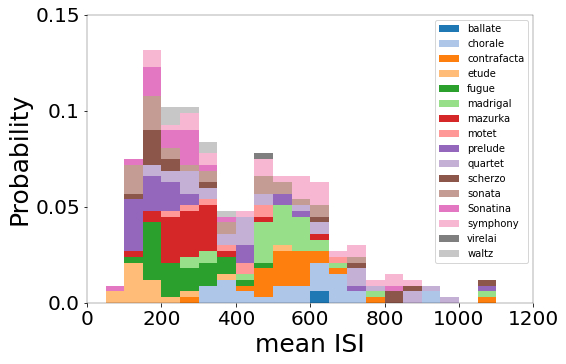

In [109]:
fig, ax = plt.subplots(figsize = (8,5.3))
plt.hist(tuple(data), np.arange(0,1200,50), histtype='barstacked', label = labels, color = clr)
plt.xlim([0,1200])
plt.ylim([0,50])
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,60, lgn*0.05), np.round(np.arange(0, 0.16,0.05),2), fontsize = 20)
plt.xlabel("mean ISI", fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.legend()
axis=['top','bottom','left','right']
line_width=[0.3, 0.3, 0.3, 0.3]
#plt.xscale("log")
for a,w in zip(axis, line_width):  # change axis width
    ax.spines[a].set_linewidth(w)
    
#plt.savefig("histogram_cum.png", bbox_inches = "tight")